# Intrduction 

#### Topic :Wrangle and Analyze Data- WeRateDogs Twitter Archive 

The dataset will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

**The Data :**

1. twitter-archive-enhanced.csv : Basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet’s text, which I used to extract rating, dog name, and dog “stage” (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive “enhanced.” Of the 5000+ tweets.

2. Tweet image predictions (image_predictions.tsv) : what breed of dog (or other objects, animal, etc.) is present in each tweet according to a neural network.

3. json_tweet : Each tweet’s retweet count and favorite (“like”) count at minimum, and any additional data you find interesting.


#### Data Wrangling Process :
1. Gathering data
2. Assessing data
3. Cleaning data

In [269]:
#import all the needed libraraies 

import pandas as pd
import numpy as np
import requests
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import time
import re
import warnings

%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set_style('darkgrid')

# Part 1 : Gather Data

The first steps of wrangling data is Gathering data because simply we cant work without data on hands.
In this part , we will read three files:
1. CSV File "twitter-archive-enhanced.csv"
2. TSV File "image-predictions.tsv"
3. TXT File "json-tweet.txt"

Finaly we will have data the goes to the next steps "Assesing data".

In [270]:
twitter_archive =pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [271]:
# import image by using get
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response =requests.get(url)

In [272]:
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [273]:
imagepred=pd.read_csv('image-predictions.tsv',sep='\t')
imagepred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


I tried to take permission from Twitter to use Twitter API but they refuse it twise , so I will proceede by using the file provided by udacity "tweet-json.txt".

In [274]:
# I will read the file by usding open the file and create Dataframe to pass the data from json file .
with open('tweet-json.txt') as file:
    json_tweet_api = pd.DataFrame((json.loads(line) for line in file),
                               columns = ['id', 'retweet_count','favorite_count' ])
    
# Adjusted the columns names.
    json_tweet_api.columns = ['tweet_id', 'retweet', 'favorite']
    

In [275]:
#read the file to check the changes. 
json_tweet_api.head()

,tweet_id,retweet,favorite
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Part 2 : Assessing Data


**Quality:** issues with content. Low quality data is also known as dirty data.

**Tidiness:** issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

There two types of assessment:

**Visual assessment:** scrolling through the data in your preferred software application (Google Sheets, Excel, a text editor, etc.).

**Programmatic assessment:**  using code to view specific portions and summaries of the data (pandas' head, tail, and info methods, for example).

In [276]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [277]:
twitter_archive.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [278]:
#Also, we can take random sample
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1041,743980027717509120,NaN,NaN,2016-06-18 01:33:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Geno. He's a Wrinkled Baklavian Velveeta. Looks sad but that's just the extra skin. 11/10 would smoosh face https://t.co/Kxda28JmQ2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743980027717509120/photo/1,11,10,Geno,None,None,None,None
2096,670755717859713024,NaN,NaN,2015-11-29 00:06:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Gin &amp; Tonic. They're having a staring contest. Very very intense. 9/10 for both https://t.co/F6bI9dF16E,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670755717859713024/photo/1,9,10,Gin,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,"https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1",14,10,Bo,doggo,None,None,None
451,818627210458333184,NaN,NaN,2017-01-10 01:15:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Wafer. He represents every fiber of my being. 13/10 very good dog https://t.co/I7bkhxBxUG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818627210458333184/photo/1,13,10,Wafer,None,None,None,None
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773788876800/photo/1,10,10,his,doggo,None,None,None


In [279]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [280]:
# Check if the tweet id is unique
twitter_archive.tweet_id.is_unique

True

In [281]:
#check rating numerator and denominator if it follow the instruction given:
#These ratings almost always have a denominator of 10. 
#The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10,

print(twitter_archive.rating_numerator.value_counts())
print( twitter_archive.rating_denominator.value_counts())

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64
10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64


In [282]:
# I want a list of tweet id with rating denominator greater than 10.
twitter_archive[twitter_archive.rating_denominator > 10][['tweet_id', 'rating_denominator']]

,tweet_id,rating_denominator
342,832088576586297345,15
433,820690176645140481,70
784,775096608509886464,11
902,758467244762497024,150
1068,740373189193256964,11
1120,731156023742988288,170
1165,722974582966214656,20
1202,716439118184652801,50
1228,713900603437621249,90
1254,710658690886586372,80


In [283]:
twitter_archive[twitter_archive.rating_denominator > 10].tweet_id.count()

20

In [284]:
twitter_archive.name.value_counts()

None       745
a          55 
Charlie    12 
Oliver     11 
Cooper     11 
           .. 
Kulet      1  
William    1  
Boots      1  
Dobby      1  
Skye       1  
Name: name, Length: 957, dtype: int64

In [285]:
# check if all id is unique
twitter_archive.tweet_id.nunique()

2356

In [286]:
twitter_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [287]:
# check if there is duplicated urls
twitter_archive.expanded_urls.nunique()


2218

In [288]:
imagepred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [289]:
imagepred.tail(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [290]:
imagepred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
738,687124485711986689,https://pbs.twimg.com/media/CYkoE10WEAAWqxm.jpg,1,car_mirror,0.997121,False,seat_belt,0.000375,False,beagle,0.000216,True
293,671347597085433856,https://pbs.twimg.com/media/CVEbFDRWsAAkN_7.jpg,1,picket_fence,0.382918,False,rain_barrel,0.108809,False,plastic_bag,0.038878,False
1822,834786237630337024,https://pbs.twimg.com/media/C5XBp19WYAA5a_v.jpg,1,Border_terrier,0.156276,True,Norwegian_elkhound,0.125912,True,Boston_bull,0.096624,True
197,669603084620980224,https://pbs.twimg.com/media/CUroc7QW4AATIff.jpg,1,Maltese_dog,0.659619,True,Tibetan_terrier,0.193539,True,Shih-Tzu,0.039327,True
1020,710153181850935296,https://pbs.twimg.com/media/Cdr4jO2UAAAIo6W.jpg,2,cowboy_hat,0.979053,False,sombrero,0.010682,False,cocker_spaniel,0.002713,True
618,680221482581123072,https://pbs.twimg.com/media/CXCh0QZW8AALdXm.jpg,1,bubble,0.240173,False,hen,0.146222,False,abaya,0.139342,False
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,0.000599,False
714,685532292383666176,https://pbs.twimg.com/media/CYN_-6iW8AQhPu2.jpg,1,white_wolf,0.318524,False,dingo,0.215436,False,collie,0.095805,True
1869,844580511645339650,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,washer,0.903064,False,dishwasher,0.032489,False,printer,0.016456,False
539,676957860086095872,https://pbs.twimg.com/ext_tw_video_thumb/676957802976419840/pu/img/dCj-qlXo73A5hf6Q.jpg,1,Labrador_retriever,0.772423,True,beagle,0.055902,True,golden_retriever,0.031152,True


In [291]:
imagepred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [292]:
imagepred['jpg_url'].nunique()

2009

In [293]:
sum(imagepred.jpg_url.duplicated())

66

In [294]:
imagepred['jpg_url'].is_unique

False

In [295]:
json_tweet_api.sample(10)

,tweet_id,retweet,favorite
1413,698703483621523456,425,1608
377,827933404142436356,5987,22180
1539,689623661272240129,748,2467
84,876120275196170240,4903,28490
522,809448704142938112,1696,7727
710,784517518371221505,2970,10039
1180,718971898235854848,1231,3818
1553,688894073864884227,792,2462
103,872261713294495745,6649,35085
1723,680070545539371008,994,2818


In [296]:
json_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tweet_id  2354 non-null   int64
 1   retweet   2354 non-null   int64
 2   favorite  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [297]:
json_tweet_api.tweet_id.nunique()

2354

### Quality Issues
Twitter_archive Table:
1.	timestamp- object
2.	text are not complete.
3.	There is rating denominator > 10 which is not acceptable
4.	tweet id - int
5.	Some dogs names has only one letter such as 'a' 'an' and 'none'is not a name. and names has different format
6.	NAN value in many column, should be replaced with none.
7.	Some of Expand urls has more than one link.
8.	Some of the data are retweet and replies - not tweet.
9.	Source written in HTML format.
10.	Rating numerator > 20
11.	doggo', 'floofer', 'pupper', 'puppo' - one column
12.	duplicate values
13.	create rating column

Image prediction Table :
1.	p1,p2,p3 has both small and capital letter for the prediction.
2.	The columns p1 ,p2,p3 is confusing and difficult for other people to understand.
3.	The data set should includes 2356 not only 2073.
4.	There is 66 jpg-url is duplicated.
5.	Data format of predictions some separated with _ .

json_tweet_api Table:
1.	tweet_id - int

### Tidness Issues:
1. Types of dogs should be belong to one columns insted of one for each!
2. The three tables should be merge to one table since they represent the same data.


# Part 3 : Cleaning Data

After assesing the data and we made a list of things needs to be fixed and adjusted ,

This where the quality and tidness issues are remedied. We make sure that the data is accurate and ready for analysis.
The Define, Code, and Test are the process of cleaning , were used in this sequence, with multiple definitions, cleaning operations, and tests under each header, respectively.

The cleaned data would be added to new DataFrame for best practice.

In [298]:
# First , we will make a copy of each file for cleaned data.
twitter_archive_cleaned= twitter_archive.copy()
imagepred_clean = imagepred.copy()
json_tweet_api_clean= json_tweet_api.copy()

In [299]:
twitter_archive_cleaned.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


> ### twitter_archive_cleaned Table

1.1 Define "Change the data type of tweet_id to String"

1.2 code:

In [300]:
twitter_archive_cleaned['tweet_id'] = (twitter_archive_cleaned['tweet_id']).astype('str')

2.1 Define "Change the data type of timestamp to datetime"

2.2 code:

In [301]:
twitter_archive_cleaned.timestamp =pd.to_datetime(twitter_archive_cleaned.timestamp)

**1.3 & 2.3 Test**

In [302]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

Define : Delete the retweet and replies which is not tweet.

Code:

In [303]:
# First , I will identify the index of retweet 
retweets = twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_id 
                                == twitter_archive_cleaned.retweeted_status_id].index

#The same for replies
replies = twitter_archive_cleaned[twitter_archive_cleaned.in_reply_to_status_id
                               == twitter_archive_cleaned.in_reply_to_status_id].index

In [304]:
# drop the index of retweet
twitter_archive_cleaned.drop(index = retweets, inplace = True)
#the same for replies
twitter_archive_cleaned.drop(index = replies, inplace = True)

Test:

In [305]:
#check if the retweets droped
print(twitter_archive_cleaned[twitter_archive_cleaned.retweeted_status_id 
                                == twitter_archive_cleaned.retweeted_status_id].empty)

True


In [306]:
#check if the replies droped
print(twitter_archive_cleaned[twitter_archive_cleaned.in_reply_to_status_id
                               == twitter_archive_cleaned.in_reply_to_status_id].empty)

True


3.1 Define: Delete un-neccessary columns from the data set.

3.2 code:

In [307]:
twitter_archive_cleaned.drop(['retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id'],
                             axis = 1, inplace = True)

3.3 Test 

In [308]:
twitter_archive_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

4.1 Define: Comined 'doggo', 'floofer','pupper', 'puppo' into one columns dogs_type

4.2 Code:

In [309]:
twitter_archive_cleaned['dogs_type'] = twitter_archive_cleaned['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

4.3 Test

In [310]:
twitter_archive_cleaned.dogs_type.value_counts()

pupper     240
doggo      80 
puppo      29 
floofer    4  
Name: dogs_type, dtype: int64

In [311]:
#drop them
twitter_archive_cleaned.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace= True)

In [312]:
twitter_archive_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dogs_type'],
      dtype='object')

5.1 Define : Fix the duplicated "expand urls" by fixing the links.

5.2 Code:

In [313]:
for tweetid , columns in twitter_archive_cleaned.iterrows():
    twitter_archive_cleaned.loc['tweet_id','expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str('tweet_id')

5.3 Test

In [314]:
twitter_archive_cleaned.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_type
2274,667455448082227200,2015-11-19 21:32:34+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s https://t.co/uLzRi1drVK,https://twitter.com/dog_rates/status/667455448082227200/photo/1,7.0,10.0,Reese,NaN
316,834931633769889797,2017-02-24 01:03:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tucker. He decided it was time to part ways with his favorite ball. We captured the emotional farewell on camera. 12/10 https://t.co/jTe7Y6P0HK,"https://twitter.com/dog_rates/status/834931633769889797/photo/1,https://twitter.com/dog_rates/status/834931633769889797/photo/1,https://twitter.com/dog_rates/status/834931633769889797/photo/1",12.0,10.0,Tucker,NaN
2146,669923323644657664,2015-11-26 16:59:01+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX,https://twitter.com/dog_rates/status/669923323644657664/photo/1,10.0,10.0,a,NaN
973,750071704093859840,2016-07-04 21:00:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Pause your cookout and admire this pupper's nifty hat. 10/10 https://t.co/RG4C9IdNJM,"https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1,https://twitter.com/dog_rates/status/750071704093859840/photo/1",10.0,10.0,None,pupper
503,813066809284972545,2016-12-25 17:00:08+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tyr. He is disgusted by holiday traffic. Just trying to get to Christmas brunch on time. 12/10 hurry up pup https://t.co/syuTXARdtN,https://twitter.com/dog_rates/status/813066809284972545/photo/1,12.0,10.0,Tyr,NaN


6.1 Define : Drops null expanded urls 

6.2 Code:

In [315]:
twitter_archive_cleaned = twitter_archive_cleaned.dropna(subset=['expanded_urls'])

6.3 Test:

In [316]:
twitter_archive_cleaned[twitter_archive_cleaned['expanded_urls'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_type


7.1 Define : the source copy HTML format which might difficult for non-developer 
    to understand , so I will extract the important data from the link.

7.2 Code:

In [317]:
twitter_archive_cleaned['source'] = twitter_archive_cleaned['source'].str.replace(r'<[^>]*>', '')

7.3 Test :

In [318]:
twitter_archive_cleaned.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_type
1632,684460069371654144,2016-01-05 19:42:51+00:00,Twitter for iPhone,This is Jeph. He's a Western Sagittarius Dookmarriot. Frightened by leaf. Caught him off guard. 10/10 calm down Jeph https://t.co/bicyOV6lju,https://twitter.com/dog_rates/status/684460069371654144/photo/1,10.0,10.0,Jeph,NaN
1271,709409458133323776,2016-03-14 16:02:49+00:00,Twitter for iPhone,This is Billy. He sensed a squirrel. 8/10 damn it Billy https://t.co/Yu0K98VZ9A,https://twitter.com/dog_rates/status/709409458133323776/photo/1,8.0,10.0,Billy,NaN
1890,674767892831932416,2015-12-10 01:49:36+00:00,Twitter for iPhone,This pup was carefully tossed to make it look like she's riding that horse. I have no words this is fabulous. 12/10 https://t.co/Bob33W4sfD,https://twitter.com/dog_rates/status/674767892831932416/photo/1,12.0,10.0,None,NaN


In [319]:
twitter_archive_cleaned['source'].value_counts()

Twitter for iPhone     1962
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: source, dtype: int64

8.1 Define : Text doesn't show the complete pargraph.

8.2 Code:

In [320]:
pd.set_option('display.max_colwidth',-1 )

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


8.3 Test :

In [321]:
twitter_archive_cleaned.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_type
1678,682047327939461121,2015-12-30 03:55:29+00:00,Twitter for iPhone,We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT,https://twitter.com/dog_rates/status/682047327939461121/photo/1,10.0,10.0,None,NaN
849,766008592277377025,2016-08-17 20:27:34+00:00,Twitter for iPhone,This is Angel. She stole the @ShopWeRateDogs shirt from her owner. Fits pretty well actually. 11/10 would forgive https://t.co/jaivZ1dcUL,https://twitter.com/dog_rates/status/766008592277377025/photo/1,11.0,10.0,Angel,NaN
1883,674805413498527744,2015-12-10 04:18:42+00:00,Twitter for iPhone,When your entire life is crumbling before you and you're trying really hard to hold your shit together.\n10/10 https://t.co/vqFkgYPCW8,https://twitter.com/dog_rates/status/674805413498527744/video/1,10.0,10.0,None,NaN


9.1 Define : Delete tweet id with empty cell "Iterate"

In [322]:
twitter_archive_cleaned[twitter_archive_cleaned['tweet_id'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_type
tweet_id,NaN,NaT,NaN,NaN,https://twitter.com/dog_rates/status/tweet_id,NaN,NaN,NaN,NaN


9.2 Code:

In [323]:
twitter_archive_cleaned = twitter_archive_cleaned.dropna(subset=['tweet_id'])

9.3 Test:

In [324]:
twitter_archive_cleaned[twitter_archive_cleaned['tweet_id'].isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_type


10.1 name has invalid names such as "a", "an", "such" , and some have diffrent format like 'DonDon','CeCe',
so we will correct them and convert them to none.

10.2 Code:

In [325]:
# Replace invalid_wors with None.
invalide_words = twitter_archive_cleaned.name.str.islower()
twitter_archive_cleaned.loc[invalide_words,'name'] = 'None'

In [326]:
# make all names capitlize "titled"
twitter_archive_cleaned['name'] = twitter_archive_cleaned['name'].str.title()

10.3 Test

In [327]:
assert [i in twitter_archive_cleaned.name.unique() for i  in invalide_words]

In [328]:
twitter_archive_cleaned['name'].value_counts()

None         704
Charlie      11 
Lucy         11 
Cooper       10 
Oliver       10 
             .. 
Charleson    1  
Eve          1  
Maxwell      1  
Bauer        1  
Skye         1  
Name: name, Length: 930, dtype: int64

In [329]:
print('Dog Names :-> ', sorted(twitter_archive_cleaned.name.unique()))

Dog Names :->  ['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al', 'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander', 'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley', 'Bear', 'Beau', 'Bebe', 'Beckham', 'Beebop', 'Beemo', 'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu', 'Blue', 'Bluebert', 'Bo', 'Bob', 'Bobb', 'Bobbay', 'Bobble', 'Bobby', 'Bode', 'Bo

11.1 Define : change the rating numerator and rating_denominator to float.

11.2  code:

In [330]:
twitter_archive_cleaned.rating_numerator = twitter_archive_cleaned.rating_numerator.astype('float')
twitter_archive_cleaned.rating_denominator = twitter_archive_cleaned.rating_denominator.astype('float')

11.3 Test :

In [331]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2094 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   object             
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   float64            
 6   rating_denominator  2094 non-null   float64            
 7   name                2094 non-null   object             
 8   dogs_type           352 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 163.6+ KB


12.1 Fix rating denomitaor by extaracting the right number from the text.

In [332]:
twitter_archive_cleaned[twitter_archive_cleaned.rating_denominator > 10][['tweet_id','text','rating_numerator' ,'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0


12.2 Code:

In [333]:
#First, fix the values that extracted incorrectly - manually 

twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '740373189193256964', ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '740373189193256964', ['rating_numerator']] = 14
  
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '722974582966214656', ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '722974582966214656', ['rating_numerator']] = 13                           

In [334]:
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '775096608509886464', ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '775096608509886464', ['rating_numerator']] = 14

In [335]:
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '682962037429899265', ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '682962037429899265', ['rating_numerator']] = 10

In [336]:
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '716439118184652801', ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '716439118184652801', ['rating_numerator']] = 11

In [337]:
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '775096608509886464', ['rating_denominator']] = 10
twitter_archive_cleaned.loc[twitter_archive_cleaned['tweet_id'] == '775096608509886464', ['rating_numerator']] = 14

In [338]:
#Drop rating_denominator that is more than 10 and keep only rating=10
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned.rating_denominator == 10]

12.3 Test :

In [339]:
twitter_archive_cleaned[twitter_archive_cleaned.rating_denominator > 10]['rating_denominator']

Series([], Name: rating_denominator, dtype: float64)

In [340]:
twitter_archive_cleaned[twitter_archive_cleaned.rating_denominator < 10]['rating_denominator']

Series([], Name: rating_denominator, dtype: float64)

13.1 Define : Drop rating_numerator > 20 , because its not reasonable to have 1776.0 ,420.0 , 75.0 as rating. 

In [341]:
twitter_archive_cleaned.rating_numerator.value_counts().sort_index(ascending = False)

1776.0    1  
420.0     1  
75.0      1  
27.0      1  
26.0      1  
14.0      39 
13.0      288
12.0      485
11.0      414
10.0      435
9.0       152
8.0       98 
7.0       51 
6.0       32 
5.0       34 
4.0       15 
3.0       19 
2.0       9  
1.0       4  
0.0       1  
Name: rating_numerator, dtype: int64

13.2 Code:

In [342]:
twitter_archive_cleaned = twitter_archive_cleaned[twitter_archive_cleaned.rating_numerator <= 20]

13.3 Test:

In [343]:
twitter_archive_cleaned.rating_numerator.value_counts().sort_index(ascending = False)

14.0    39 
13.0    288
12.0    485
11.0    414
10.0    435
9.0     152
8.0     98 
7.0     51 
6.0     32 
5.0     34 
4.0     15 
3.0     19 
2.0     9  
1.0     4  
0.0     1  
Name: rating_numerator, dtype: int64

In [344]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2076 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   object             
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   float64            
 6   rating_denominator  2076 non-null   float64            
 7   name                2076 non-null   object             
 8   dogs_type           345 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), object(6)
memory usage: 162.2+ KB


14.1 Create Dog rating to have one accurate value for comparison

14.2 Code:

In [345]:
twitter_archive_cleaned['dog_rating'] = twitter_archive_cleaned['rating_numerator'] / twitter_archive_cleaned['rating_denominator']

14.3 Test :

In [346]:
twitter_archive_cleaned.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_type,dog_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,1.3


> ### Image_prediction Table

1. Define : Change tweet_id to string.

Code:

In [347]:
imagepred_clean['tweet_id'] = (imagepred_clean['tweet_id']).astype('str')

Test:

In [348]:
imagepred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


2. Define:The columns name not clear , Adjust the image_prediction columns names.

In [349]:
imagepred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

Code:

In [350]:
imagepred_clean.rename(columns = {'img_num': 'image_number','p1': 'prediction_1',
                                  'p1_conf':'confidence_prediction_1', 'p1_dog':'prediction_isdog_1'},inplace = True)

In [351]:
imagepred_clean.rename(columns = {'p2': 'prediction_2','p2_conf':'confidence_prediction_2',
                                  'p2_dog':'prediction_isdog_2'},inplace = True)

In [352]:
imagepred_clean.rename(columns = {'p3': 'prediction_3','p3_conf':'confidence_prediction_3',
                                  'p3_dog':'prediction_isdog_3'},inplace = True)

Test

In [353]:
imagepred_clean.columns

Index(['tweet_id', 'jpg_url', 'image_number', 'prediction_1',
       'confidence_prediction_1', 'prediction_isdog_1', 'prediction_2',
       'confidence_prediction_2', 'prediction_isdog_2', 'prediction_3',
       'confidence_prediction_3', 'prediction_isdog_3'],
      dtype='object')

3. Define : the predictions have diffrent format , I will make the first letter upper case and I will remove the _ with space.

Code:

In [354]:
imagepred_clean['prediction_1'] = imagepred_clean['prediction_1'].str.replace('_', ' ')
imagepred_clean['prediction_1'] = imagepred_clean['prediction_1'].str.title()

In [355]:
imagepred_clean['prediction_2'] = imagepred_clean['prediction_2'].str.replace('_', ' ')
imagepred_clean['prediction_2'] = imagepred_clean['prediction_2'].str.title()

In [356]:
imagepred_clean['prediction_3'] = imagepred_clean['prediction_3'].str.replace('_', ' ')
imagepred_clean['prediction_3'] = imagepred_clean['prediction_3'].str.title()

Test:

In [357]:
imagepred_clean.sample(5)

,tweet_id,jpg_url,image_number,prediction_1,confidence_prediction_1,prediction_isdog_1,prediction_2,confidence_prediction_2,prediction_isdog_2,prediction_3,confidence_prediction_3,prediction_isdog_3
1678,813202720496779264,https://pbs.twimg.com/media/C0kTjqIXgAAqpRi.jpg,1,Cocker Spaniel,0.701852,True,Golden Retriever,0.120345,True,Labrador Retriever,0.036320,True
101,667793409583771648,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,Dalmatian,0.535073,True,English Setter,0.451219,True,Great Dane,0.008164,True
630,680934982542561280,https://pbs.twimg.com/media/CXMqwIQWcAA2iE0.jpg,1,Labrador Retriever,0.784398,True,Siberian Husky,0.055925,True,Beagle,0.022750,True
1419,771500966810099713,https://pbs.twimg.com/media/CrTsCPHWYAANdzC.jpg,1,Labrador Retriever,0.833952,True,Golden Retriever,0.103223,True,Soccer Ball,0.012094,False
1803,832040443403784192,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,Miniature Pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire Bullterrier,0.030943,True


4. Define : Drop 66 jpg url duplicated

Code:

In [358]:
imagepred_clean = imagepred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [359]:
sum(imagepred_clean['jpg_url'].duplicated())

0

> ### Json_tweet Table

1. Define :change tweet_id to string

code:

In [360]:
json_tweet_api_clean['tweet_id'] = (json_tweet_api_clean['tweet_id']).astype('str')

In [361]:
json_tweet_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2354 non-null   object
 1   retweet   2354 non-null   int64 
 2   favorite  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


## Tidness : Comine the three Tables to one 

In [362]:
twitter_master_df = pd.merge(twitter_archive_cleaned,imagepred_clean, how = 'left', on = 'tweet_id')

In [363]:
#tweeter_df = pd.merge(cleaned_archive, cleaned_images, how='outer', on=['tweet_id'])
twitter_master_df= pd.merge(twitter_master_df ,json_tweet_api_clean, how = 'outer', on = ['tweet_id'])
twitter_master_df.head(4)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_type,dog_rating,...,confidence_prediction_1,prediction_isdog_1,prediction_2,confidence_prediction_2,prediction_isdog_2,prediction_3,confidence_prediction_3,prediction_isdog_3,retweet,favorite
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,1.3,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,1.3,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,1.2,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,1.3,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,8964,42908


In [364]:
# I noticed with merger cause some duplicated tweet_id ,so I will remove them.
twitter_master_df.drop_duplicates(subset ='tweet_id', 
                     keep = 'first' , inplace = True) 

In [365]:
sum(twitter_master_df.tweet_id.duplicated())

0

### Store the final clean data to CSV file for Analysis.

In [391]:
twitter_master_df.to_csv('twitter_archive_master.csv', index=False)

# Part 4: Analysis & Visulization

In [392]:
df= pd.read_csv('twitter_archive_master.csv')
df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dogs_type,dog_rating,...,confidence_prediction_1,prediction_isdog_1,prediction_2,confidence_prediction_2,prediction_isdog_2,prediction_3,confidence_prediction_3,prediction_isdog_3,retweet,favorite
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,1.3,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,1.3,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6514,33819


In [381]:
df.columns

Index(['Unnamed: 0', 'tweet_id', 'timestamp', 'source', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dogs_type', 'dog_rating', 'jpg_url', 'image_number', 'prediction_1',
       'confidence_prediction_1', 'prediction_isdog_1', 'prediction_2',
       'confidence_prediction_2', 'prediction_isdog_2', 'prediction_3',
       'confidence_prediction_3', 'prediction_isdog_3', 'retweet', 'favorite'],
      dtype='object')

> ### Is there Correlation between Favorite and Retweet ?

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


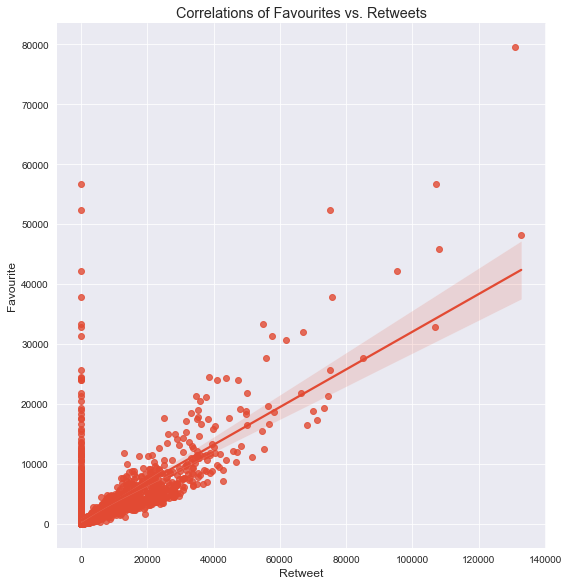

In [382]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x='favorite',y='retweet', size = 8, data=df)
plt.title('Correlations of Favourites vs. Retweets')
plt.xlabel('Retweet')
plt.ylabel('Favourite');

•	We can notice there is a strong , positive liner relationship b\w Favorites and retweets as we assume.

> ### Which dog prediction is popular? And who gets high rating ?
first I will create Breed column that includes all the predictions.then I will do the analysis.

In [383]:
# Create selection order for all he prediction columns 
status = [(df['prediction_isdog_1'] == True),(df['prediction_isdog_2'] == True), (df['prediction_isdog_3'] == True)]
breed_selection = [df['prediction_1'], df['prediction_2'], df['prediction_3']]

In [384]:
# select the breed prediction based on successful condition
df['breed'] = np.select(status, breed_selection, default = 'none')

Text(0, 0.5, 'breed')

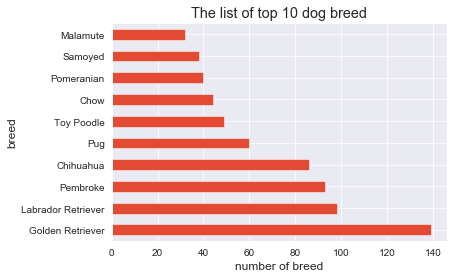

In [385]:
# check the top 10 breed.
top10_breed= df[df.breed != 'none'].breed.value_counts().head(10)
           
top10_breed.plot.barh(stacked = True , title='The list of top 10 dog breed')

plt.xlabel("number of breed")
plt.ylabel("breed")

•Golden Retriever is the most common breed with almost 160 count,

Labrador Retriever comes in the second level of popularity with almost 110 count.

In [386]:
#who gets more favorite count among dog breed
breed_mean = df.groupby('breed').mean().head(7)
avg_breed_rating =breed_mean['dog_rating'].sort_values()
avg_breed_rating

breed
Afghan Hound                      0.800000
Airedale                          0.983333
American Staffordshire Terrier    1.031250
Basenji                           1.033333
Basset                            1.070588
Appenzeller                       1.100000
Australian Terrier                1.150000
Name: dog_rating, dtype: float64

Text(0.5, 0, 'Avg rating')

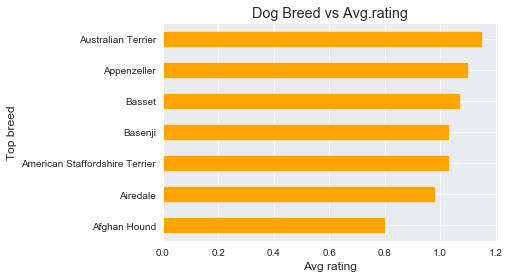

In [387]:
avg_breed_rating.plot.barh(stacked = True ,title='Dog Breed vs Avg.rating', color='orange')
  
plt.ylabel("Top breed")
plt.xlabel("Avg rating")


•Based on the rating , Australian Terrier gets the highest rating with average ~ 1.15. then Appenzeller with 1.10 rating.


> ### Which type of dogs is most popular , and more favorable by people ?

In [375]:
# Types of dogs 
df.dogs_type.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [388]:
# Which type of doogs is most popular excluding the nan.
dog_type_rank = df[df.dogs_type != 'nan'].dogs_type.value_counts().head(4)

print("Most popular Type of dogs in order: \n")
print(dog_type_rank)


Most popular Type of dogs in order: 

pupper     233
doggo      79 
puppo      29 
floofer    4  
Name: dogs_type, dtype: int64


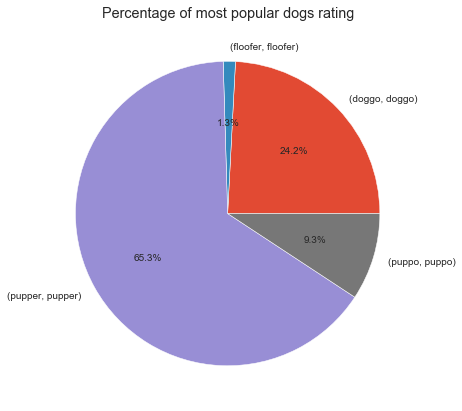

In [389]:
def pie_chart (variable):
    df.groupby([variable, 'dogs_type']).sum()['dog_rating'].plot(figsize=(7,7),kind='pie',autopct='%1.1f%%')
    plt.ylabel('');
 
plt.title('Percentage of most popular dogs rating')
pie_chart('dogs_type')


As a result , the Puppos are the most popular type on average rating among the others by 65.3 % which is high percentage , after that doggo type by 24.2%.

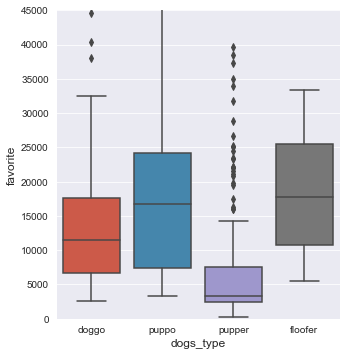

In [390]:
# Found out which dog has more favorites
favorite_dog = sns.catplot(x="dogs_type",y="favorite",kind='box',data=df)
favorite_dog.set(ylim=(0, 45000))

based on the plotted points , pupper less favorable among the other types and has greater outlier than other. 

Where floffer then puppo are the most favorite one.

# Refrences:

https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe

https://www.geeksforgeeks.org/python-pandas-series-str-replace-to-replace-text-in-a-series/?ref=rp

